# Yelp review analysis 
This is a coding challenge application for fellowship.ai

## 1. Challenge 
Perform Sentiment analysis on Yelp reviews - Full. Do a thorough Exploratory Data Analysis of the dataset and report the final performance metrics for your approach. Suggest ways in which you can improve the model.

## 2. Data source description 
The Yelp reviews full star dataset is constructed by randomly taking 130,000 training samples and 10,000 testing samples for each review star from 1 to 5. In total there are 650,000 trainig samples and 50,000 testing samples.

The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 2 columns in them, corresponding to class index (1 to 5) and review text. The review texts are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

Data source link: https://course.fast.ai/datasets

## 3. Evaluation 

> My goal is to attain atleast 95% accuracy using accessible machine learning models for the sentiment analysis

## 4. Preparing the tools

In [97]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#we want our plot to appear inside the notebook
%matplotlib inline
# Model from Scikit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
#from sklearn.grid_search import GridSearchCV

## 5. Getting the dataset into notebook

In [2]:
## Changing into relevant data directory (Change according to data directory)
cd yelp_review_full_csv/

/Users/henrickaduda/Downloads/sample_project/Projects/yelp_review_full_csv


In [46]:
# Getting the dataset and adding in headers
yelp_reviews = pd.read_csv("train.csv", names= ["Stars", "Reviews"], nrows=26000)

In [48]:
# Shuffle dataframe
yelp_reviews = yelp_reviews.sample(frac = 1)

## 6. Exploratory Data analysis

In [49]:
# Checking data frame 
yelp_reviews.head()

,Stars,Reviews
7178,4,"Awesome meal - flavorful food, large portions,..."
10734,3,"If you go here for the muffins only, it's 5 s..."
18937,2,We call this Gay Denny's or Jenny's. \n\nIt's ...
18328,4,Loved the feel of this place. I had Suki Udon ...
18240,4,Service is not why you should visit this joint...


In [50]:
# Frequency of customer  star ratings in train data
yelp_reviews.Stars.value_counts()

3    5484
2    5413
4    5277
1    5039
5    4787
Name: Stars, dtype: int64

In [52]:
# Brief overivew of datsset
yelp_reviews.describe()

,Stars
count,26000.000000
mean,2.975385
std,1.386475
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [53]:
# Checking for datatypes and null values in dataset
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 7178 to 22248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Stars    26000 non-null  int64 
 1   Reviews  26000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [54]:
# Checking datatypes of columns
yelp_reviews.dtypes

Stars       int64
Reviews    object
dtype: object

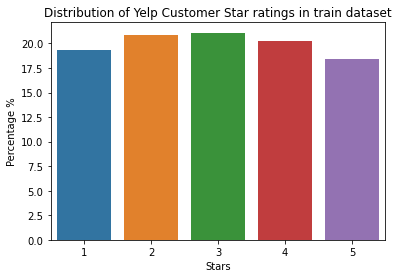

In [58]:
# Displaying the frequency of customer ratings in train data
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=yelp_reviews, x='Stars', y='Stars', estimator=lambda x: len(x) / len(yelp_reviews) * 100)
ax.set(ylabel="Percentage %")
plt.title('Distribution of Yelp Customer Star ratings in train dataset')
plt.show();

In [62]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
yelp_reviews['length'] = yelp_reviews['Reviews'].apply(len)
yelp_reviews.head()

,Stars,Reviews,length
7178,4,"Awesome meal - flavorful food, large portions,...",192
10734,3,"If you go here for the muffins only, it's 5 s...",241
18937,2,We call this Gay Denny's or Jenny's. \n\nIt's ...,388
18328,4,Loved the feel of this place. I had Suki Udon ...,322
18240,4,Service is not why you should visit this joint...,417


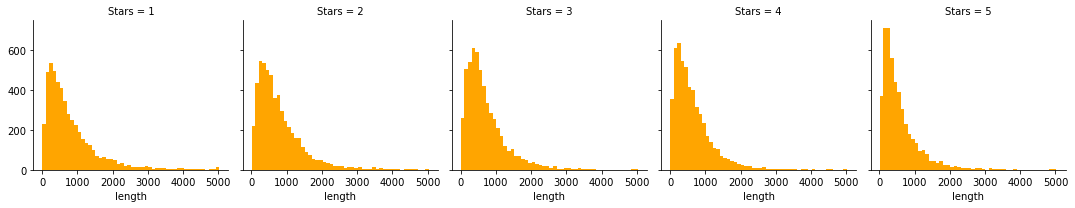

In [78]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=yelp_reviews,col='Stars')
graph.map(plt.hist,'length',bins=50,color='orange');

In [67]:
# CLASSIFICATION
yelp_reviews_classes = yelp_reviews[(yelp_reviews['Stars']==1) | (yelp_reviews['Stars']==3) | (yelp_reviews['Stars']==5)]
yelp_reviews.head()
print(yelp_reviews_classes.shape)

# Seperate the dataset into X and Y for prediction
x = yelp_reviews['Reviews']
y = yelp_reviews['Stars']
print(x.head())
print(y.head())

(15310, 3)
7178     Awesome meal - flavorful food, large portions,...
10734    If you go here for the muffins only,  it's 5 s...
18937    We call this Gay Denny's or Jenny's. \n\nIt's ...
18328    Loved the feel of this place. I had Suki Udon ...
18240    Service is not why you should visit this joint...
Name: Reviews, dtype: object
7178     4
10734    3
18937    2
18328    4
18240    4
Name: Stars, dtype: int64


In [81]:
# adding in stop words ( words that are not meaningful for the text analysis)
# from previous yelp review analysis words like super, duper and place were considered uncessary
from nltk.corpus import stopwords
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS
my_stop_words = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS) + ['an', 'the', 'place'])

### Word cloud 

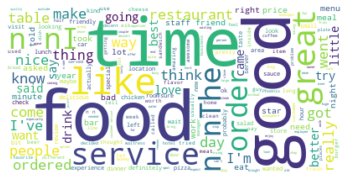

<Figure size 432x288 with 0 Axes>

In [14]:
# Building a word cloud to highlight words with high frequency in rview data
# import relevant library
from wordcloud import WordCloud
# concatenate all the reviews into one single string 
full_text = ' '.join(yelp_reviews['Reviews'])
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)
plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig("yelp_review_word_cloud.jpg")

In [15]:
cloud_no_stopword.to_file('yelp_review_world_cloud.jpg')

### Most frequent words 

In [16]:
# tokenization - to find the most frequent words in the review data
from nltk.tokenize import word_tokenize
from nltk import FreqDist
lower_full_text = full_text.lower()
word_tokens = word_tokenize(lower_full_text)
tokens = list()
for word in word_tokens:
    if word.isalpha() and word not in my_stop_words:
        tokens.append(word)
token_dist = FreqDist(tokens)
dist = pd.DataFrame(token_dist.most_common(20),columns=['Word', 'Frequency'])

In [17]:
# Checking dataframe of frequent words 
dist

,Word,Frequency
0,food,15340
1,good,14868
2,like,12228
3,time,9289
4,great,9142
5,service,8624
6,really,7981
7,got,5414
8,nice,5062
9,ordered,4775


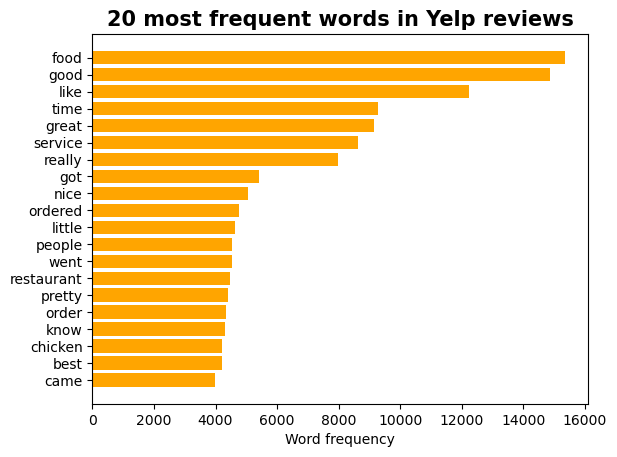

In [18]:
# Import relevant libraries
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Creating variables to insert in our plot
freq_words = dist.Word
y_pos = np.arange(len(freq_words))
frequency = dist.Frequency
# Creating horizontal bar plot
ax.barh(y_pos, frequency , align='center', color ='orange')
# adding more information to the plot (labels, titles, ticks)
ax.set_yticks(y_pos)
ax.set_yticklabels(freq_words)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word frequency')
ax.set_title('20 most frequent words in Yelp reviews', fontweight= 'bold', fontsize = 15)

plt.show()

### Why people love it?
To find out what people love about the service from good positive reviews

In [21]:
# Subsetting dataframe to obtain good reviews (with ratings 4 and 5 only)
yelp_good_reviews = yelp_reviews[yelp_reviews["Rating"] >= 4]

In [22]:
# Check if subsetting was successful
yelp_good_reviews.Rating.value_counts()

4    5277
5    4787
Name: Rating, dtype: int64

In [23]:
import re

In [24]:
from nltk.tokenize import sent_tokenize
good_reviews = ' '.join(yelp_good_reviews.Reviews)
# split the long string into sentences
sentences_good = sent_tokenize(good_reviews)
good_token_clean = list()
# get tokens for each sentence
for sentence in sentences_good:
    eng_word = re.findall(r'[A-Za-z\-]+', sentence)
    good_token_clean.append([i.lower() for i in eng_word if i.lower() not in my_stop_words])

In [25]:
#print(sentences_good[:3])
print(good_token_clean[:3])

[['saturday', 'afternoon', 'time', 'n', 'nwhen', 'walked', 'rambunctious', 'group', 'old', 'ladies', 'talking', 'importance', 'good', 'support', 'bra', 'taking', 'pictures', 'chests'], ['agree'], ['n', 'ni', 'comment', 'price', 'drinks', 'sent', 'guys', 'open', 'tab', 'comment', 'heavy', 'hand', 'poured', 'drinks']]


In [26]:
# Word2Vec uses a neural network model to learn word associations from the corpus. Here we are trying to find why people love the service
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=good_token_clean,vector_size=500, window=10, min_count=1, workers=4, sg=0)
model_ted.predict_output_word(['service'], topn=10)

[('friendly', 0.46082878),
 ('attentive', 0.041093066),
 ('great', 0.04052699),
 ('excellent', 0.03249238),
 ('prompt', 0.020343376),
 ('customer', 0.018762872),
 ('reasonable', 0.017798262),
 ('knowledgeable', 0.0150790075),
 ('pleasant', 0.01234419),
 ('fast', 0.00807068)]

seems being friendly and attentive is on of the reasons people love the services being offered as per yelp reviews

### Vectorization and splitting data

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# vectorization
vect = CountVectorizer(max_features=3000, stop_words=my_stop_words)
vect.fit(yelp_reviews.Reviews)
X = vect.transform(yelp_reviews.Reviews)
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
# Define the vector of targets and matrix of features
y = yelp_reviews.Stars
X = X_df
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## 7. Modelling 
I used mutiple machine learning algorithms to see which gives the best performance

In [145]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
predmnb = mnb.predict(X_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[961 409  85  31  26]
 [410 628 423 104  59]
 [135 260 771 373 106]
 [ 77  70 359 730 347]
 [103  26  99 419 789]]
Score: 49.73
Classification Report:               precision    recall  f1-score   support

           1       0.57      0.64      0.60      1512
           2       0.45      0.39      0.42      1624
           3       0.44      0.47      0.46      1645
           4       0.44      0.46      0.45      1583
           5       0.59      0.55      0.57      1436

    accuracy                           0.50      7800
   macro avg       0.50      0.50      0.50      7800
weighted avg       0.50      0.50      0.50      7800



In [146]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(X_train,y_train)
predrmfr = rmfr.predict(X_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[1099  267   69   25   52]
 [ 438  595  382  121   88]
 [ 166  330  695  306  148]
 [  87  115  402  559  420]
 [  98   70  135  353  780]]
Score: 47.79
Classification Report:               precision    recall  f1-score   support

           1       0.58      0.73      0.65      1512
           2       0.43      0.37      0.40      1624
           3       0.41      0.42      0.42      1645
           4       0.41      0.35      0.38      1583
           5       0.52      0.54      0.53      1436

    accuracy                           0.48      7800
   macro avg       0.47      0.48      0.47      7800
weighted avg       0.47      0.48      0.47      7800



In [147]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt = dt.predict(X_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[736 360 179 120 117]
 [368 444 384 253 175]
 [186 344 522 371 222]
 [117 214 375 484 393]
 [ 95 137 202 402 600]]
Score: 35.72
Classification Report:               precision    recall  f1-score   support

           1       0.49      0.49      0.49      1512
           2       0.30      0.27      0.28      1624
           3       0.31      0.32      0.32      1645
           4       0.30      0.31      0.30      1583
           5       0.40      0.42      0.41      1436

    accuracy                           0.36      7800
   macro avg       0.36      0.36      0.36      7800
weighted avg       0.36      0.36      0.36      7800



In [148]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred_lg = log_reg.predict(X_test)
# find the most informative words
log_odds = log_reg.coef_[0]
coeff = pd.DataFrame(log_odds, X.columns, columns=['coef'])\
            .sort_values(by='coef', ascending=False)

In [149]:
# Create a hyperparameter grid for LogisiticRegression 

log_reg_grid= {"C": np.logspace(-4,4,20),
              "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000, 50),
          "max_depth": [None, 3, 5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [154]:
# Using GridSearchCV
# Different hyperparameter for our LogisticRegression model 
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(max_iter=1000),
                         param_grid= log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [155]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.01610262027560939, 'solver': 'liblinear'}

In [156]:
# Evaluate the grid search LogisticRegression model 
gs_log_reg.score(X_test, y_test)

0.5134615384615384

## 8. Results so far

* Multinomial Naive Bayes : 49.73%
* Random Forest: 47.79%
* Decision Tree: 35.72%
* Logistic regression: 51.34%

Unfortunately I have not been able to hit my model accuracy target of 80%.My suggestions to improve model performance are:
1. Use GridSearchCV to improve each model performance
2. Look into removing special characters in review data 
4. Look at performance of other models

Because the models have performed poorly... I do not have confidence that they will predict correct star ratings..... I believe that given the opportunity in this program I will be able to identify ways to improve model performances for textual analysis given that it is my first time conducting this analysis.